<a href="https://colab.research.google.com/github/jonmessier/Project-2/blob/main/Project_2_Part_4_Student_Dropout_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro
Jon Messier\
1/10/23



##Assignment 1
Your second project is going to have a lot more freedom than your first project. This is because we want you to have a project in your portfolio that interests you or relates to the industry you would like to work in.

Your task for this week is to propose two possible datasets you would like to work with for Project 2.

You will choose your first choice data set, and a backup data set in case the first proposed data set is not approved.

This data can be from any source and can be on any topic with these limitations:
- the data must be available for use (it is your responsibility to ensure that the license states that you are able to use it.)
- the data must be appropriate for a professional environment
- the data must not contain personal information
- the data must not be a dataset used for any assignment, lecture, or task from the course
- the data must not be a time series dataset. You will be able to identify these because each row will represent a moment in time. These kinds of datasets follow special rules and are not appropriate for the kind of machine learning you have learned in this stack.

Make sure you select a dataset that will be reasonable to work with in the amount of time we have left. Think about what questions you could reasonably answer with the dataset you select.

You must propose two datasets that each have a supervised learning component. You may choose a regression or classification problem for each proposed data set.

- [x] The dataset you choose must be approved by the instructor.
 - Dataset selected - Student Dropout rate

##Assignment 2
Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

- [x] Deleted unnecessary columns.
- [x] Deleted duplicate rows.
- [x] Identified and addressed missing values.
- [x] Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- [x] Produced univariate visuals for the target and all features.
- [ ] Identified outliers.
- [ ] Clearly commented all of your cleaning steps and described any decisions you made.

Commit your file to your Github repository and submit the link below.

##Assignment 3
Note: You are not clustering your data for this assignment.

For this part of the project, you will continue your data exploration by:
- [x] Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap. 
- [x] Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.
- [x] Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the finding associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither should be histograms, boxplots, or correlation plots). 

Please submit the link to your GitHub Repository.

## Assignment 4
You are now entering into the model development phase of the project!

- [x]    Ensure that you complete the appropriate pre-processing steps.
- [x]    Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model).
- [x]    Perform PCA or another feature engineering technique on your dataset to see how this impacts your results. 
 - [ ] (We encourage you to try multiple techniques depending on your data!).
- [x]    Evaluate model performance with appropriate metrics for the model.
- [x]    Choose your "production" model and justify this decision.
- [x]    Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!).
- [x]    Update your project readme and describe your final model, your final model evaluation metrics, and explain whether or not your model would be useful in production and if so, how it should be used.
- [x]    Commit your code to GitHub.

Submit the link to your GitHub repository.

##Assignment 5
This is your last week to work on your second project! Next week during our live class, you will be giving a short (5 minute) presentation about your project to a stakeholder associated with your data set. You need to be ready to present the first day of class next week (the order of presentations will be randomly assigned). Your presentation should include background information about your stakeholder and their problem, information about your data, visualizations, and results/conclusions/recommendations.

Unlike your earlier presentation, this presentation should be designed for a non-technical audience.  This means you should not include code or cleaning steps in your presentation. You should also be mindful of the visualizations you use for sharing your analysis. 

For this week's task, your presentation should include:

- [ ]    Who is your stakeholder and what problem are you solving for them
- [ ]    A brief introduction to your data
- [ ]    Two visuals that demonstrate key findings of interest to your stakeholder. These visuals should be reporting quality.  Be sure to explain the finding associated with each visual.  (No histograms, boxplots, or correlation plots) (Note: you should have created these visuals for Project 2 Part 3 earlier in this stack)
- [ ]    A brief description of the strengths and limitations of your model for your stakeholder.
- [ ]    If it is a regression problem, use an interpretable metric and provide an explanation for what it means for your stakeholder's problem.
- [ ]    If it is a classification problem, explain how your model's false positive and false negative rates will affect your stakeholder. Be sure to consider class balance in your evaluation.
- [ ]    Final recommendations based on your analysis.

Your task for this week is to complete your project and prepare your presentation. Make sure to include your presentation slide deck on your GitHub repository for your project. Submit the link to your project GitHub repository with your completed project.

#Class Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', None)

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

#Pipelines/Selectors
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
#display as diagrams
from sklearn import set_config
set_config(display='diagram')

#Import Prinicpal component analysis
from sklearn.decomposition import PCA

# Import SMOTE
from imblearn.over_sampling import SMOTE
# Import special pipeline for smote
from imblearn.pipeline import make_pipeline as smote_pipe

# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, \
RocCurveDisplay

# Import RandomOverSampling RandomUnderSampling and sampler pipelines
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Custom Functions

##`df_inspect`

In [ ]:
#Define an inspection function to report for duplicates, and Nan values
#remove duplicates and output list of nan counts and total
def df_inspect(df):
  print('-----'*5)
  if df.duplicated().sum() >>0:
    print(f'The total number of duplicates are : {df.duplicated().sum()}\n')
    df.drop_duplicates(inplace=True)
    print('All duplicate entries have been removed.\n')
  print(f'There are no duplicate entries.')
  print('-----'*5)
  print('\n')  
  
  #Nan values
  print('-----'*5)
  print(f'The total number of NaN-values is:{df.isna().sum().sum()}')
  if df.isna().sum().sum() >0:
   print('- - -'*5)
   print('Missing/NaN values will have to be addressed in our visual analysis and data modeling.')
   print(f'The sum of NaN-values in each column:')
   print(df.isna().sum())
  else:
   print('There are no missing values, and will not need to be adressed in our analysis.')
  print('-----'*5)
  print('\n')  
  #shape
  print('-----'*5)
  print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
  print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')
  print('-----'*5)
  print('\n')   
  #datatypes - compare to data dictionary
  print('-----'*5)
  print("Compare the following datatypes to the Data Dictionary")
  print('- - - '*5)
  print(df.dtypes)
  print('-----'*5)
  print('\n')

##`plot_charts`

In [ ]:
def plot_charts(df, col, boxplot = False):
 if boxplot:
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,3), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  #Histogram axes[0]
  sns.histplot(data=df,x = col,ax = axes[0])
  #add the mean to the histogram
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
            label=f"Mean Value = ${mean_value:,.2f}",);
  #add the median to the histogram
  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
            label=f"Median Value = ${med_value:,.2f}");

  #boxplot -- axes[1]
  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'Histogram and Box plot for {col}')

# Turn off the comparitive boxplot  
 else:
   fig, axes = plt.subplots(figsize=(5,5))
   plt.xticks(rotation=45)
   #hist = sns.histplot(data=df,x=col, ax=axes,binwidth=1)
   bp=sns.barplot(data = df, 
            x = df[col].value_counts().sort_values(ascending=False),
            y = df[col].value_counts().sort_values(ascending=False).index,
            order = df[col].value_counts().sort_values(ascending=False).index,
            orient='h',
            label = 'test' );
   axes.set(xlabel='Count of '+col, ylabel=col)
  

 ## Fixing any overlapping labels and showing
 plt.tight_layout()
 plt.show()

##`eval_sampling`

In [ ]:
def eval_sampling(model,title):
  #Base
  base_pipe = make_pipeline(col_transformer,model)
  base_pipe.fit(X_train, y_train)
  base_preds = base_pipe.predict(X_test)

  #Undersampling
  model_under_pipe = make_sampler_pipeline(col_transformer, under_sampler, model)
  model_under_fit = model_under_pipe.fit(X_train, y_train);
  model_under_preds = model_under_fit.predict(X_test);

  #Oversampling
  model_over_pipe = make_sampler_pipeline(col_transformer, over_sampler, model);
  model_over_fit = model_over_pipe.fit(X_train, y_train);
  model_over_preds = model_over_fit.predict(X_test);

  #SMOTE
  model_smote_pipe = make_sampler_pipeline(col_transformer, smote, model);
  model_smote_fit = model_smote_pipe.fit(X_train, y_train);
  model_smote_preds = model_smote_fit.predict(X_test);

  print('-----'*5)
  print(f'Comparison of Under-, Over-, and SMOTE class balancing methods for Model:{title}')
  print('-----'*5)
  print('Undersampling')
  print('- - - '*5)
  print(classification_report(y_test, model_under_preds))
  disp = ConfusionMatrixDisplay.from_predictions(y_test, model_under_preds,normalize='true',cmap='Blues');
  disp.ax_.set_title('Undersampling')
  print('- - - '*5)
  print('Oversampling')
  print('- - - '*5)
  print(classification_report(y_test, model_over_preds))
  disp = ConfusionMatrixDisplay.from_predictions(y_test, model_over_preds,normalize='true',cmap='Blues');
  disp.ax_.set_title('Oversampling')
  print('- - - '*5)
  print('SMOTE')
  print('- - - '*5)
  print(classification_report(y_test, model_smote_preds))
  disp = ConfusionMatrixDisplay.from_predictions(y_test, model_smote_preds,normalize='true',cmap='Blues');
  disp.ax_.set_title('SMOTE')

  summary = { 'Model':title,
              'Base Accuracy': accuracy_score(y_test, base_preds),
              'Undersamping Accuracy':accuracy_score(y_test,model_under_preds),
              'Oversamping Accuracy':accuracy_score(y_test,model_over_preds),
              'SMOTE Accuracy':accuracy_score(y_test,model_smote_preds),
              'Base Precision': precision_score(y_test, base_preds),
              'Undersamping Precision':precision_score(y_test,model_under_preds),
              'Oversamping Precision':precision_score(y_test,model_over_preds),
              'SMOTE Precision':precision_score(y_test,model_smote_preds),
              'Base Model Recall': recall_score(y_test, base_preds),
              'Undersamping Recall':recall_score(y_test,model_under_preds),
              'Oversamping Recall':recall_score(y_test,model_over_preds),
              'SMOTE Recall':recall_score(y_test,model_smote_preds),
              }
  summary = pd.DataFrame([summary])
  return summary

## `get_metrics`

In [ ]:
def get_metrics(model, title):
 model_preds = model.predict(X_test)

 metrics = {'Model:': title,
            'Accuracy': accuracy_score(y_test, model_preds),
            'Precision': precision_score(y_test, model_preds),
            'Recall': recall_score(y_test, model_preds),
            'F1 Score': f1_score(y_test, model_preds)
            }
 metrics = pd.DataFrame([metrics])
 return metrics

#Problem Statement
## Predict students' dropout and academic success
Overview found [HERE](https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.

- **For what purpose was the dataset created?**  The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course.

- **Who funded the creation of the dataset?**  This dataset is supported by program SATDAP - Capacitação da Administração Pública under grant POCI-05-5762-FSE-000191, Portugal.

- **Are there recommended data splits?**  The dataset was used, in out project, with a data split of 80% for training and 20% for test.

- **Was there any data preprocessing performed?** We performed a rigorous data preprocessing to handle data from anomalies, unexplainable outliers, and missing values.

- **Has the dataset been used for any tasks already?**  The dataset was used in a pilot project to provide the tutoring team at our higher education institution with an estimate of the risk of dropout and failure. With this information, the tutoring team provides more accurate help to students.

- **Citation Requests/Acknowledgements:**  If you use this dataset in experiments for a scientific publication, please kindly cite our paper: M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

- License: This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

##Data Dictionary
- [x] Need to fix this to wrap the text.... or something else.  Suggestions?!


<table>
<thead><tr><th>Attribute Name</th><th>Role</th><th>Type</th><th>Description</th><th>Units</th><th>Missing Values</th></tr></thead> <tbody><tr><td>Marital status</td><td>Feature</td><td>Discrete</td><td>1 – single 2 – married 3 – widower 4 – divorced 5 – facto union <br>6 – legally separated</td><td>1</td><td>false</td> </tr><tr><td>Application mode</td><td>Feature</td><td>Discrete</td><td>1 - 1st phase - general contingent <br>2 - Ordinance No. 612/93 <br>5 - 1st phase - special contingent (Azores Island) <br>7 - Holders of other higher courses <br>10 - Ordinance No. 854-B/99 <br>15 - International student (bachelor) <br>16 - 1st phase - special contingent (Madeira Island) <br>17 - 2nd phase - general contingent <br>18 - 3rd phase - general contingent <br>26 - Ordinance No. 533-A/99, item b2) (Different Plan) <br>27 - Ordinance No. 533-A/99, item b3 (Other Institution) <br>39 - Over 23 years old <br>42 - Transfer <br>43 - Change of course <br>44 - Technological specialization diploma holders <br>51 - Change of institution/course <br>53 - Short cycle diploma holders <br>57 - Change of institution/course (International)</td><td></td><td>false</td> </tr><tr><td>Application order</td><td>Feature</td><td>Discrete</td><td>Application order (between 0 - first choice; and 9 last choice)</td><td></td><td>false</td> </tr><tr><td>Course</td><td>Feature</td><td>Discrete</td><td>33 - Biofuel Production Technologies <br>171 - Animation and Multimedia Design <br>8014 - Social Service (evening attendance) <br>9003 - Agronomy <br>9070 - Communication Design <br>9085 - Veterinary Nursing <br>9119 - Informatics Engineering <br>9130 - Equinculture <br>9147 - Management <br>9238 - Social Service <br>9254 - Tourism <br>9500 - Nursing <br>9556 - Oral Hygiene <br>9670 - Advertising and Marketing Management <br>9773 - Journalism and Communication <br>9853 - Basic Education <br>9991 - Management (evening attendance)</td><td></td><td>false</td> </tr><tr><td>Daytime/evening attendance	</td><td>Feature</td><td>Discrete</td><td>1 – daytime <br>0 - evening</td><td></td><td>false</td> </tr><tr><td>Previous qualification</td><td>Feature</td><td>Discrete</td><td>1 - Secondary education <br>2 - Higher education - bachelor's degree <br>3 - Higher education - degree <br>4 - Higher education - master's <br>5 - Higher education - doctorate <br>6 - Frequency of higher education <br>9 - 12th year of schooling - not completed <br>10 - 11th year of schooling - not completed <br>12 - Other - 11th year of schooling <br>14 - 10th year of schooling <br>15 - 10th year of schooling - not completed <br>19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. <br>38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. <br>39 - Technological specialization course <br>40 - Higher education - degree (1st cycle) <br>42 - Professional higher technical course <br>43 - Higher education - master (2nd cycle)</td><td></td><td>false</td> </tr><tr><td>Previous qualification (grade)</td><td>Feature</td><td>Continuous</td><td>Grade of previous qualification (between 0 and 200)</td><td></td><td>false</td> </tr><tr><td>Nacionality</td><td>Feature</td><td>Discrete</td><td>1 - Portuguese; <br>2 - German; <br>6 - Spanish; <br>11 - Italian; <br>13 - Dutch; <br>14 - English; <br>17 - Lithuanian; <br>21 - Angolan; <br>22 - Cape Verdean; <br>24 - Guinean; <br>25 - Mozambican; <br>26 - Santomean; <br>32 - Turkish; <br>41 - Brazilian; <br>62 - Romanian; <br>100 - Moldova (Republic of); <br>101 - Mexican; <br>103 - Ukrainian; <br>105 - Russian; <br>108 - Cuban; <br>109 - Colombian</td><td></td><td>false</td> </tr><tr><td>Mother's qualification</td><td>Feature</td><td>Discrete</td><td>1 - Secondary Education - 12th Year of Schooling or Eq. <br>2 - Higher Education - Bachelor's Degree <br>3 - Higher Education - Degree <br>4 - Higher Education - Master's <br>5 - Higher Education - Doctorate <br>6 - Frequency of Higher Education <br>9 - 12th Year of Schooling - Not Completed <br>10 - 11th Year of Schooling - Not Completed <br>11 - 7th Year (Old) <br>12 - Other - 11th Year of Schooling <br>14 - 10th Year of Schooling <br>18 - General commerce course <br>19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. <br>22 - Technical-professional course <br>26 - 7th year of schooling <br>27 - 2nd cycle of the general high school course <br>29 - 9th Year of Schooling - Not Completed <br>30 - 8th year of schooling <br>34 - Unknown <br>35 - Can't read or write <br>36 - Can read without having a 4th year of schooling <br>37 - Basic education 1st cycle (4th/5th year) or equiv. <br>38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. <br>39 - Technological specialization course <br>40 - Higher education - degree (1st cycle) <br>41 - Specialized higher studies course <br>42 - Professional higher technical course <br>43 - Higher Education - Master (2nd cycle) <br>44 - Higher Education - Doctorate (3rd cycle)</td><td></td><td>false</td> </tr><tr><td>Father's qualification</td><td>Feature</td><td>Discrete</td><td>1 - Secondary Education - 12th Year of Schooling or Eq. <br>2 - Higher Education - Bachelor's Degree <br>3 - Higher Education - Degree <br>4 - Higher Education - Master's <br>5 - Higher Education - Doctorate <br>6 - Frequency of Higher Education <br>9 - 12th Year of Schooling - Not Completed <br>10 - 11th Year of Schooling - Not Completed <br>11 - 7th Year (Old) <br>12 - Other - 11th Year of Schooling <br>13 - 2nd year complementary high school course <br>14 - 10th Year of Schooling 18 - General commerce course <br>19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. <br>20 - Complementary High School Course <br>22 - Technical-professional course <br>25 - Complementary High School Course - not concluded <br>26 - 7th year of schooling <br>27 - 2nd cycle of the general high school course <br>29 - 9th Year of Schooling - Not Completed <br>30 - 8th year of schooling <br>31 - General Course of Administration and Commerce <br>33 - Supplementary Accounting and Administration <br>34 - Unknown <br>35 - Can't read or write <br>36 - Can read without having a 4th year of schooling <br>37 - Basic education 1st cycle (4th/5th year) or equiv. <br>38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. <br>39 - Technological specialization course <br>40 - Higher education - degree (1st cycle) <br>41 - Specialized higher studies course <br>42 - Professional higher technical course <br>43 - Higher Education - Master (2nd cycle) <br>44 - Higher Education - Doctorate (3rd cycle)</td><td></td><td>false</td> </tr><tr><td>Mother's occupation</td><td>Feature</td><td>Discrete</td><td>0 - Student <br>1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers <br>2 - Specialists in Intellectual and Scientific Activities <br>3 - Intermediate Level Technicians and Professions <br>4 - Administrative staff <br>5 - Personal Services, Security and Safety Workers and Sellers <br>6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry <br>7 - Skilled Workers in Industry, Construction and Craftsmen <br>8 - Installation and Machine Operators and Assembly Workers <br>9 - Unskilled Workers <br>10 - Armed Forces Professions <br>90 - Other Situation <br>99 - (blank) <br>122 - Health professionals <br>123 - teachers <br>125 - Specialists in information and communication technologies (ICT) <br>131 - Intermediate level science and engineering technicians and professions <br>132 - Technicians and professionals, of intermediate level of health <br>134 - Intermediate level technicians from legal, social, sports, cultural and similar services <br>141 - Office workers, secretaries in general and data processing operators <br>143 - Data, accounting, statistical, financial services and registry-related operators <br>144 - Other administrative support staff <br>151 - personal service workers <br>152 - sellers <br>153 - Personal care workers and the like <br>171 - Skilled construction workers and the like, except electricians <br>173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like <br>175 - Workers in food processing, woodworking, clothing and other industries and crafts <br>191 - cleaning workers <br>192 - Unskilled workers in agriculture, animal production, fisheries and forestry <br>193 - Unskilled workers in extractive industry, construction, manufacturing and transport <br>194 - Meal preparation assistants</td><td></td><td>false</td> </tr><tr><td>Father's occupation</td><td>Feature</td><td>Discrete</td><td>0 - Student <br>1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers <br>2 - Specialists in Intellectual and Scientific Activities <br>3 - Intermediate Level Technicians and Professions <br>4 - Administrative staff <br>5 - Personal Services, Security and Safety Workers and Sellers <br>6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry <br>7 - Skilled Workers in Industry, Construction and Craftsmen <br>8 - Installation and Machine Operators and Assembly Workers <br>9 - Unskilled Workers <br>10 - Armed Forces Professions <br>90 - Other Situation <br>99 - (blank) <br>101 - Armed Forces Officers <br>102 - Armed Forces Sergeants <br>103 - Other Armed Forces personnel <br>112 - Directors of administrative and commercial services <br>114 - Hotel, catering, trade and other services directors <br>121 - Specialists in the physical sciences, mathematics, engineering and related techniques <br>122 - Health professionals <br>123 - teachers <br>124 - Specialists in finance, accounting, administrative organization, public and commercial relations <br>131 - Intermediate level science and engineering technicians and professions <br>132 - Technicians and professionals, of intermediate level of health <br>134 - Intermediate level technicians from legal, social, sports, cultural and similar services <br>135 - Information and communication technology technicians <br>141 - Office workers, secretaries in general and data processing operators <br>143 - Data, accounting, statistical, financial services and registry-related operators <br>144 - Other administrative support staff <br>151 - personal service workers <br>152 - sellers <br>153 - Personal care workers and the like <br>154 - Protection and security services personnel <br>161 - Market-oriented farmers and skilled agricultural and animal production workers <br>163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence <br>171 - Skilled construction workers and the like, except electricians <br>172 - Skilled workers in metallurgy, metalworking and similar <br>174 - Skilled workers in electricity and electronics <br>175 - Workers in food processing, woodworking, clothing and other industries and crafts <br>181 - Fixed plant and machine operators <br>182 - assembly workers <br>183 - Vehicle drivers and mobile equipment operators <br>192 - Unskilled workers in agriculture, animal production, fisheries and forestry <br>193 - Unskilled workers in extractive industry, construction, manufacturing and transport <br>194 - Meal preparation assistants <br>195 - Street vendors (except food) and street service providers</td><td></td><td>false</td> </tr><tr><td>Admission grade</td><td>Feature</td><td>Continuous</td><td>Admission grade (between 0 and 200)</td><td></td><td>false</td> </tr><tr><td>Displaced</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Educational special needs</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Debtor</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Tuition fees up to date</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Gender</td><td>Feature</td><td>Discrete</td><td>1 – male 0 – female</td><td></td><td>false</td> </tr><tr><td>Scholarship holder</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Age at enrollment</td><td>Feature</td><td>Discrete</td><td>Age of studend at enrollment</td><td></td><td>false</td> </tr><tr><td>International</td><td>Feature</td><td>Discrete</td><td>1 – yes 0 – no</td><td></td><td>false</td> </tr><tr><td>Curricular units 1st sem (credited)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units credited in the 1st semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 1st sem (enrolled)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units enrolled in the 1st semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 1st sem (evaluations)</td><td>Feature</td><td>Discrete</td><td>Number of evaluations to curricular units in the 1st semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 1st sem (approved)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units approved in the 1st semester</td><td></td><td>false</td> </tr>

<tr><td>Curricular units 1st sem (grade)</td><td>Feature</td><td>Discrete</td><td>Grade average in the 1st semester (between 0 and 20)</td><td></td><td>false</td> </tr><tr><td>Curricular units 1st sem (without evaluations)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units without evalutions in the 1st semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (credited)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units credited in the 2nd semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (enrolled)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units enrolled in the 2nd semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (evaluations)</td><td>Feature</td><td>Discrete</td><td>Number of evaluations to curricular units in the 2nd semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (approved)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units approved in the 2nd semester</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (grade)</td><td>Feature</td><td>Discrete</td><td>Grade average in the 2nd semester (between 0 and 20)</td><td></td><td>false</td> </tr><tr><td>Curricular units 2nd sem (without evaluations)</td><td>Feature</td><td>Discrete</td><td>Number of curricular units without evalutions in the 1st semester</td><td></td><td>false</td> </tr><tr><td>Unemployment rate</td><td>Feature</td><td>Continuous</td><td>Unemployment rate (%)</td><td></td><td>false</td> </tr><tr><td>Inflation rate</td><td>Feature</td><td>Continuous</td><td>Inflation rate (%)</td><td></td><td>false</td> </tr><tr><td>GDP</td><td>Feature</td><td>Continuous</td><td>GDP</td><td></td><td>false</td> </tr><tr><td>Target</td><td>Target</td><td>Categorical</td><td>Target. The problem is formulated as a three category classification task <br>(dropout, enrolled, and graduate) at the end <br> of the normal duration of the course</td><td></td><td>false</td> </tr>


</tbody>

#Data Import

In [ ]:
url1 = 'https://drive.google.com/uc?id=1wHxIjk49UNfwWDvzHdoZkn6Qh_yD5YoC'
df = pd.read_csv(url1, sep=';')
df_copy = df.copy()

##Initial Data Inspection

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df_inspect(df)

-------------------------
There are no duplicate entries.
-------------------------


-------------------------
The total number of NaN-values is:0
There are no missing values, and will not need to be adressed in our analysis.
-------------------------


-------------------------
There are 4424 rows, and 37 columns.
The rows represent 4424 observations, and the columns represent 36 features and 1 target variable.
-------------------------


-------------------------
Compare the following datatypes to the Data Dictionary
- - - - - - - - - - - - - - - 
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                          

>- Looking at the datatypes I see that most categories are dtype=int64.  In this case these are categorical nominal/ordinal variables.  I'll change these to `dtype:object` and will process them via One Hot Encoding (OHE) during modeling.
  - [x] Import OneHotEncoder
  - [x] Add OHE to data pipeline
- `Application order` is an ordinal numerical column. 0 is the preferred option and 9 is the last choice.  This will require ordinal encoding during modeling
 - [x] Import OrdinalEncoder
 - [ ] Add Ordinal Encoder to preprocessing pipeline
- [x] The `Daytime/evening attendance` category has some trailing spaces at the end of it. This should get renamed.


In [ ]:
#rename Daytime/evening attendance
df.rename(columns = {'Daytime/evening attendance	': 'Daytime/evening attendance'}, inplace=True)
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [ ]:
df.describe(include='all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [ ]:
#There are only a couple continous variables in the dataset.  Everything else is 
#categorical nominal / ordinal
obj_cols = df.drop(columns=['Previous qualification (grade)','Admission grade', 
                            'Curricular units 1st sem (grade)', 
                            'Curricular units 2nd sem (grade)', 
                            'Unemployment rate', 'Inflation rate', 'GDP'])

#Convert the object columns to type(object)
for col in obj_cols:
  df[col]=df[col].astype('object')

#recreate this variable with the proper data types
obj_cols = df.drop(columns=['Previous qualification (grade)','Admission grade',
                            'Curricular units 1st sem (grade)', 
                            'Curricular units 2nd sem (grade)', 
                            'Unemployment rate', 'Inflation rate', 'GDP'])


In [ ]:
#Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   object 
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance                      4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

In [ ]:
#Ordinal columns.  These will need Ordinal encoding
ord_cols = df[["Application order"]]

#Numerical Columns
num_cols = df.select_dtypes(include='number')

### Drop unnecessary rows
I am interested in the subset of students that dropped out or graduated.  I don't really get much information from the students who are currently enrolled.  This is a classification problem and classifying a student as enrolled doesn't really help us.  Drop these rows

In [ ]:
df = df.loc[df['Target']!='Enrolled']
df.shape

(3630, 37)

> Dropping the currently enrolled students reduces my dataset from 4424 to 3630 entries.

##Numeric Data Inspection

In [ ]:
num_cols.describe()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,10.640822,10.230206,11.566139,1.228029,0.001969
std,13.188332,14.482001,4.843663,5.210808,2.663850,1.382711,2.269935
min,95.000000,95.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,11.000000,10.750000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,12.285714,12.200000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,13.400000,13.333333,13.900000,2.600000,1.790000
max,190.000000,190.000000,18.875000,18.571429,16.200000,3.700000,3.510000


For the numeric columns I look for obvious outliers, like ages over 122, etc. In this case we know that the ranges `Previous qualification (grade)` and `Admission grade` are between 0 and 200 (see Data Dictionary).  

>No out of range entries. 

We know that the both `Unemployment rate` and `Inflation rate` are percentages(%), but we don't have a sense for the quality of the data or its proper ranges without speaking with a SME.  We have no units on `GDP` so again a SME is needed for clarifiation

##Categorical Inspection
For categorical columns we have to look for inconsistancies in entries.  Since this data has been encoded to integers, I have to:
- [x] Check that the number of unique entries matches the options in the Data Dictionary. (i.e. find the length of the dictonary for each encoder)
- [x] Need to review for omissions and typos

In [ ]:
obj_cols.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,8,17,2,17,21,29,34,32,46,2,2,2,2,2,2,46,2,21,23,35,23,11,19,22,30,20,10,3
top,1,1,1,9500,1,1,1,1,37,9,9,1,0,0,1,0,0,18,0,0,6,8,6,0,0,6,8,6,0,Graduate
freq,3919,1708,3026,766,3941,3717,4314,1069,1209,1577,1010,2426,4373,3921,3896,2868,3325,1036,4314,3847,1910,791,1171,4130,3894,1913,792,965,4142,2209


>Things to note:
 - There are many categories with 2 unique options.  These can be thought of a binary states. I will keep these out of the Exploratory Visual Analysis. We can gain information from looking at the ratio of binary results, but we don't have to graph them.
 - In many of the multi-class features one class accounts for most of the data set.  `Marital status` for instance has 3919 counts of "1-single" which accounts for  88.6% of the data.

###Binary-class Categorical Nominal analysis

In [ ]:
#Isolate the binary-/multi-class categories
bin_cols = []
multi_cols = []
for col in obj_cols:
  if df[col].nunique() == 2:
    bin_cols.append(col)
  else:
    multi_cols.append(col)

#Show the binary class statistics
df[bin_cols].describe() 

,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
count,3630,3630,3630,3630,3630,3630,3630,3630,3630
unique,2,2,2,2,2,2,2,2,2
top,1,1,0,0,1,0,0,0,Graduate
freq,3222,1993,3590,3217,3144,2381,2661,3544,2209


Reviewing the statics on the binary-class we see
- `Daytime/evening attendance` : 3220/3630 are "1 - daytime" students.  **88.7%**.  This is a very unbalanced category.  
- `Displaced`: 1993/3630 are "1 - yes" . **54.9%**.  This is a well balanced variable.  I would like to know more about this category.  The most common definition is 
>displaced person (noun):
: a person expelled, deported, or impelled to flee from his or her country of nationality or habitual residence by the forces or consequences of war or oppression

  To me this is a shockingly high percentage given the above definition.  Perhaps we could consult a SME

- `Educational special needs`: 3590/3630 are "0 - no". **98.9%**.  Very Unbalanced.
- `Debtor`: 3217/3630 are "0 - no'. **88.6**.  Very Unbalanced.
- `Tuition fees up to date`: 3144/3630 are "1 - yes". **86.6%**  Very Unbalanced.
- `Gender`: 2381/3630 are "0 - female".  **65.6%**.  This is a well balanced variable. 
- `Scholarship holder`: 2661/3630 are "0 - no". **73.3%**. This is a semi-balanced variable. 
- `International`: 3544/3630 are "0 - no".  **97.6%**.   Very Unbalanced.
- `Target`: 2209/3630 are "Graduate".  **60.1%**.  This is a well balanced target variable. 

#Exploratory Visual Analysis

##Categorical Data Visualizations
For initial visual analysis, I isolate the multi-state categorical data using the `multi_cols` list of columns. Recall that these reports are the counts for the categorical objects.  The reader must look at the value in the data dictionary to see the classifcation.

###NOTES (internal use)

**Q.** What do the bin values of the histograms represent?  
**A.** In the above histograms, the bins represent values described in the Data Dictionary. Since this data has been encoded in advance, the histogram is telling us the count of the encoded value. Recall for instance that `Marital Status:[1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated]` Representing this as a table of top values may be easier to interpret. 

###Multi-class Categorical Nominal
These categoricals have more than 2 options.  Using a barchart we can quickly assess the volume of entries for each category.  Binary Categoricals are treated in a numeric-only analysis above.

In [ ]:
df[multi_cols].shape

(3630, 21)

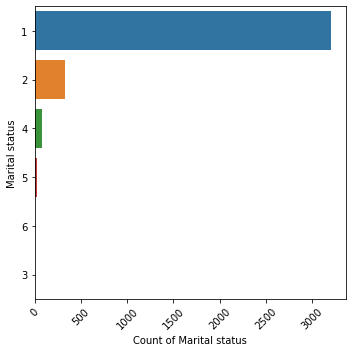

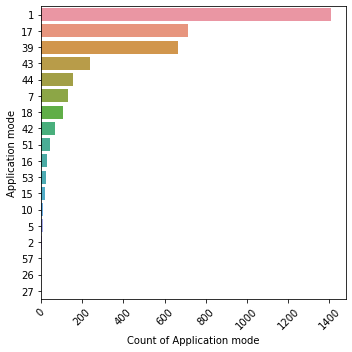

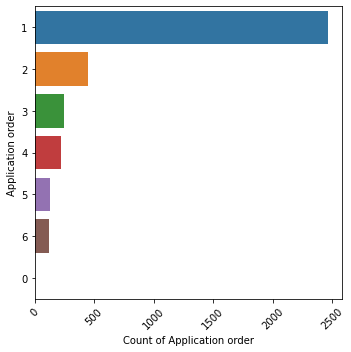

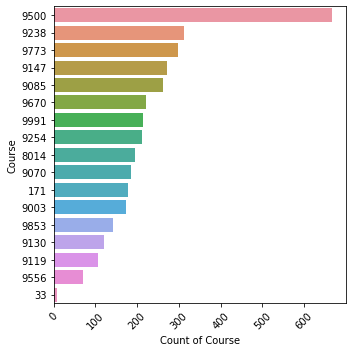

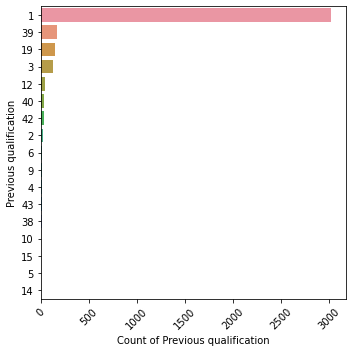

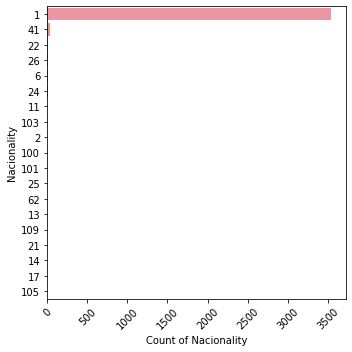

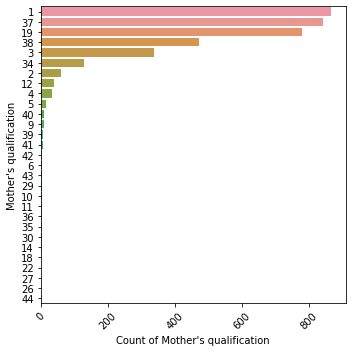

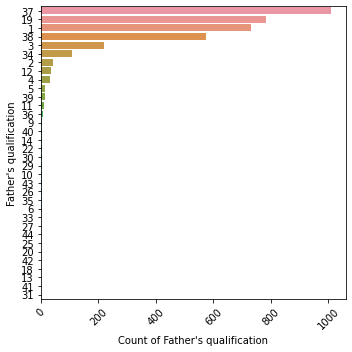

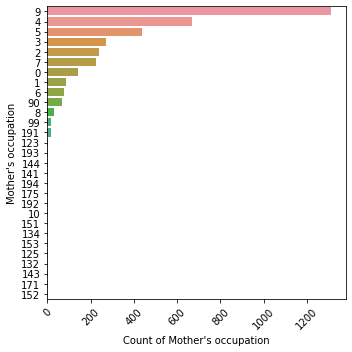

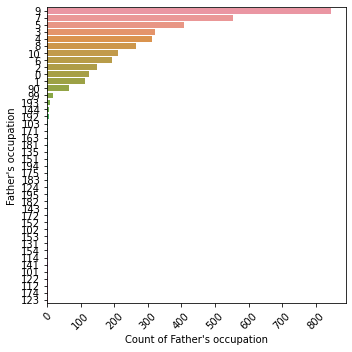

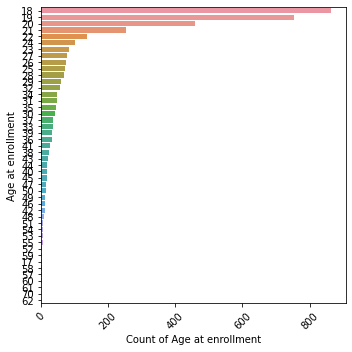

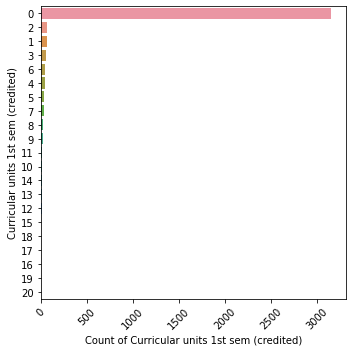

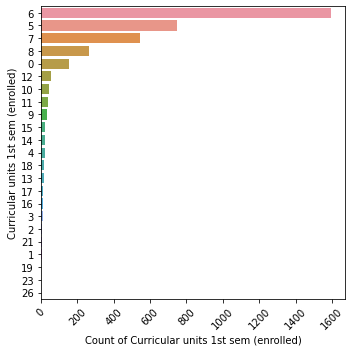

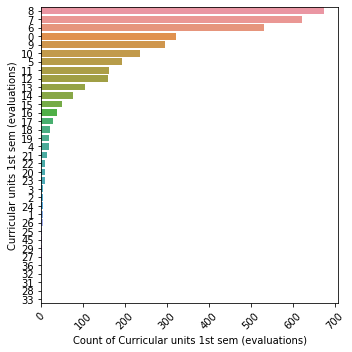

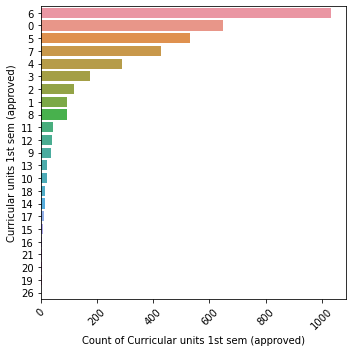

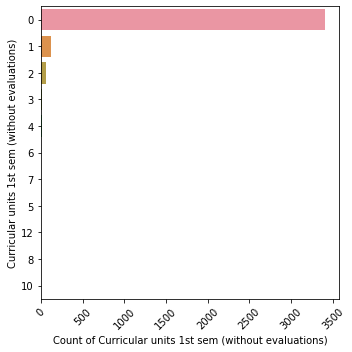

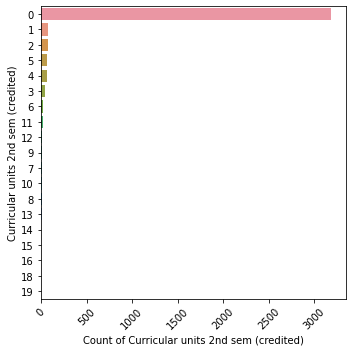

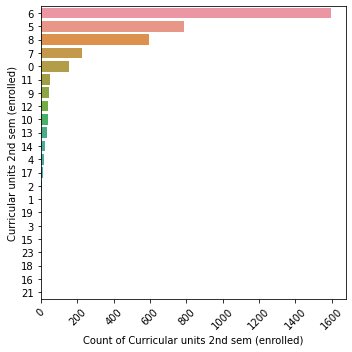

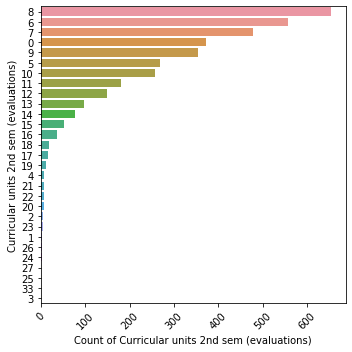

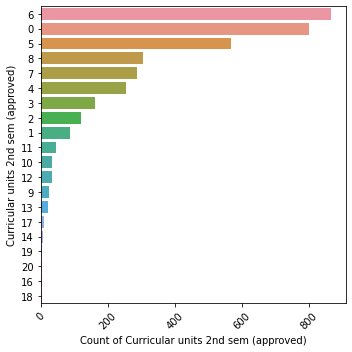

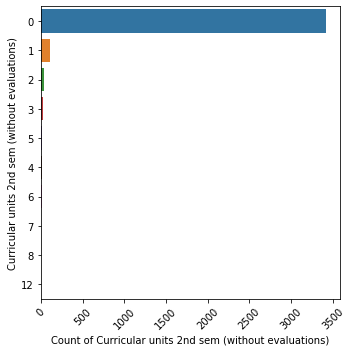

In [ ]:
#Loop through the multi-cols and plot the dataframe data for these
for col in multi_cols:
  plot_charts(df, col)

In [ ]:
df[multi_cols].describe(include='all')

,Marital status,Application mode,Application order,Course,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations)
count,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630
unique,6,18,7,17,17,19,29,34,29,42,46,21,23,35,23,11,19,22,29,20,10
top,1,1,1,9500,1,1,1,37,9,9,18,0,6,8,6,0,0,6,8,6,0
freq,3199,1408,2461,666,3019,3544,865,1010,1313,847,864,3150,1594,674,1033,3406,3183,1596,654,867,3416


Visualizing the counts of categories gives us a feel for the diversity of each category, without looking to deeply into the numbers. 
- `Marital status` - The overwhelming majority of students are single.  
- `Application mode` - most students applied with "1st phase- general contingent" followed by "2nd phase general contingent"
- `Application order` - Looks like most students got their 2nd most prefered application.  Recall "Application order (between 0 - first choice; and 9 last choice)"
- `Course` - The majority of students polled were enrolled in (course:9500) Nursing.  The second most popular course is Social Services. 
 - [ ] Does the enrolled course impact the dropout rate?  
- `Previous Qualification` - The most frequent previous qualification is "1 - Secondary education"
- `Nacionality` - the most frequent nationality is "1 - Portuguese"
 - This data shows that this study is limted to a largly 1 - Portuguese nationality.  This could give us a little bit more insight into the continous variables `Unemployment rate`, `Inflation rate`, and `GDP`. Because it is not explicit in the Data Dictionary when this data is used we make an assumption to its origin. i.e. Does the inflation rate of Portugal(where the data was taken) impact a student from Brazil (`Nacionality:42`)?  Not likely.
- `Mother's qualification` - The most common mother's qualification is Secondary education.
- `Father's qualification` - The most common father's qualification is "Basic education 1st cycle (4th/5th year) or equiv."
-  `Mother's occupation` - The most common occupation is "Unskilled Worker"
- ` Father's occupation` - The most common occupation is "Unskilled Worker"
- `Age at Enrollment` - The mean admission age is 23 with a range from 17 to 70. (This data was gathered previously and is not visualized here)
- `Curricular units 1st sem (credited)` - The most common course credit for the 1st semester is 0.  Perhaps the data was gathered mid semester, for 1st year students who would not have received credit yet.  If this is the case I would expect the dropout and graduate rates to be really low.  I'll look at this in the multivariate analysis below. 
- `Curricular units 1st sem (enrolled)` - Most students take a course load of 6, 5, 7, or 8 credits.  
- `Curricular units 1st sem (evaluations)` - The most common evaluations per curricular units is 8
- `Curricular units 1st sem (approved)` - Most students are approved for 6 units. This is follow by a large group approved for 0.

- `Curricular units 1st sem (without evaluations)` - Most students had 0 courses without evaluations.  
- `Curricular units 2nd sem (credited)` - The most common course credit for the 1st semester is 0.  Perhaps the data was gathered mid semester, for 1st year students who would not have received credit yet.  If this is the case I would expect the dropout and graduate rates to be really low.  I'll look at this in the multivariate analysis below. 
- `Curricular units 2nd sem (enrolled)` -Most students take a course load of 6, 5, 8 credits.
- `Curricular units 2nd sem (evaluations)`- The most common evaluations per curricular units is 8
- `Curricular units 2nd sem (approved)` Most students are approved for 6 units. This is follow by a large group approved for 0.
 - [ ] Do students appproved to 0 units correlate to dropouts?
- `Curricular units 2nd sem (without evaluations)` - Most students had 0 courses without evaluations.  


## Proposed columns to drop
- Marital status
- Previous qualification
- Nacionality
- Curricular units 1st sem (credited)
- Curricular units 1st sem (without evaluations)
- Curricular units 2nd sem (credited)
- Curricular units 2nd sem (without evaluations)

The data in each of the columns are overwhelmingly weighted to one class and do not provide much insight into the student.  This data may impact our modeling by skewing against the minority in each column.  

**NOTE:** Columns will be dropped at the end of the Exploratory Analysis

##Continuous Data Visual Inspection
For continuous variables I look at the count distribution, mean (red line), and median (black line).  Because there isn't much information in the data dictionary for these values, it will be challenging to make meaningful observations with respect to their distributions.  I can however highlight where we see outliers and point out potential data errors. 



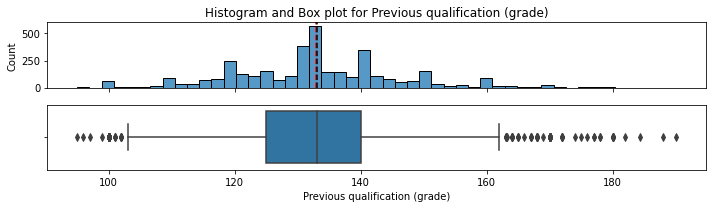

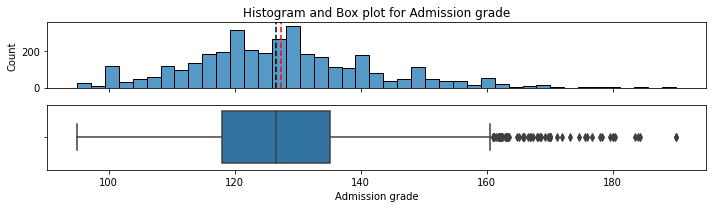

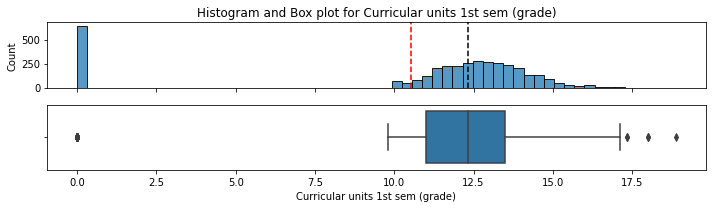

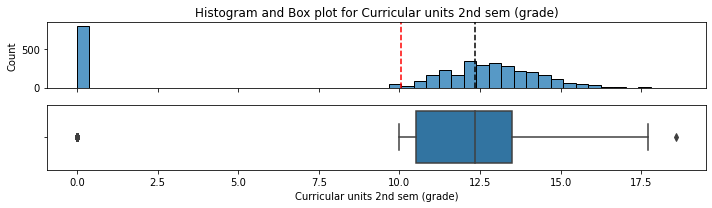

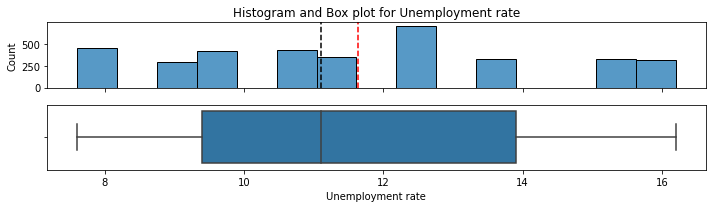

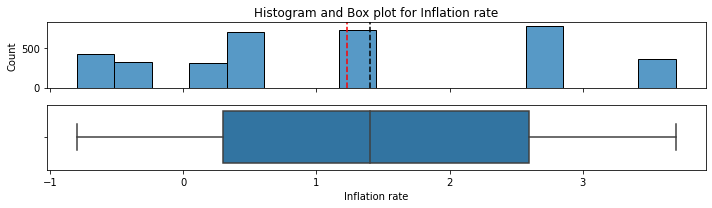

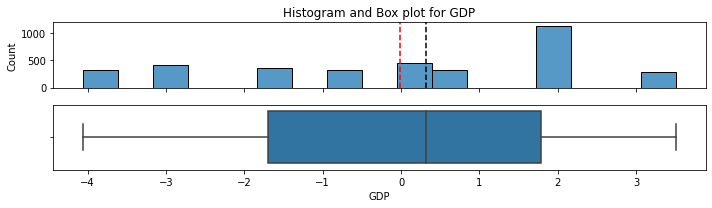

In [ ]:
for ncol in num_cols:
  plot_charts(df, ncol, boxplot=True)

In [ ]:
num_cols.describe(include='all')

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,10.640822,10.230206,11.566139,1.228029,0.001969
std,13.188332,14.482001,4.843663,5.210808,2.663850,1.382711,2.269935
min,95.000000,95.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,11.000000,10.750000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,12.285714,12.200000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,13.400000,13.333333,13.900000,2.600000,1.790000
max,190.000000,190.000000,18.875000,18.571429,16.200000,3.700000,3.510000


- `Previous qualification (grade)` - The mean previous qualification grade is 132.6 and ranges from 95 to 190.  
- `Admission grade` - The mean admission grade is 127 and ranges from 95 to 190.
- `Age at enrollment` - The mean afe at enrollment is 23 and ranges from 17 to 70.  The outliers are on the high end of the age spectrum.
- `Curricular units 1st sem (grade)` - the mean grade is 10.64 with a range of 0 to 18.875.  This data shows normal distribution about the mean with a large subset of data at 0.  
 - [ ] Compare the size of the 0-grade dataset to the # of dropouts
- `Curricular units 2nd sem (grade)` - the mean grade is 10.23 with a range of 0 to 18.57.  This data shows normal distribution about the mean with a large subset of data at 0.  
 - [ ] Compare the size of the 0-grade dataset to the # of dropouts
- `Unemployment rate` - The mean rate is 11.56%.  When we compare this to [US statistics](https://nces.ed.gov/programs/coe/indicator/ssa/college-student-employment), this number seems rather low.  
 - [ ] Is this the unemployment rate of the students or of the student's country?
- `Inflation rate` - The mean rate is 1.23 with a range from -0.8 to 3.7.
- `GDP` - The mean GDP is 0.002 (units unknown) with a range from -4.06 to 3.51


##Multivariate Visual Analysis

### School work Analysis

**Q. How does the 1st/2nd semester data affect the dropout-rate?**

For this question lets look at each of the columns that pertain to the 1st semester:

<table>
<td>Curricular units 1st/2nd sem (credited)</td><td>Number of curricular units credited in the 1st/2nd semester</td><tr>
<tr><td>Curricular units 1st/2nd sem (enrolled)</td><td>Number of curricular units enrolled in the 1st/2nd semester</td></tr>
<tr><td>Curricular units 1st/2nd sem (evaluations)</td><td>Number of evaluations to curricular units in the 1st/2nd semester</td></tr>
<tr><td>Curricular units 1st/2nd sem (approved)</td><td>Number of curricular units approved in the 1st/2nd semester</td></tr>
<tr><td>Curricular units 1st/2nd sem (without evaluations)</td><td>Number of curricular units without evalutions in the 1st/2nd semester</td></tr>
</table>


In [ ]:
sem_1 = df[['Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)',
            'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
            'Curricular units 1st sem (without evaluations)','Target']].copy()

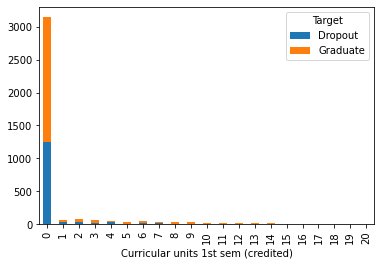

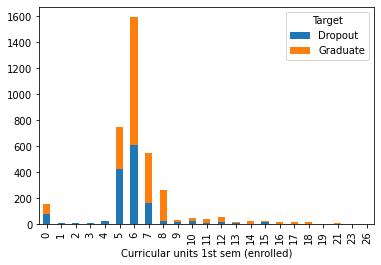

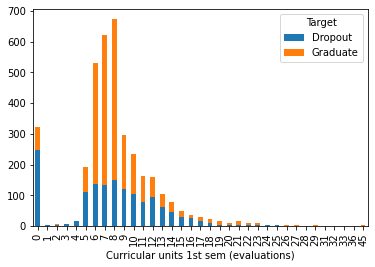

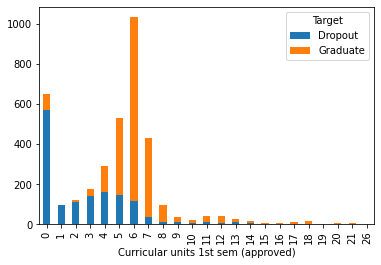

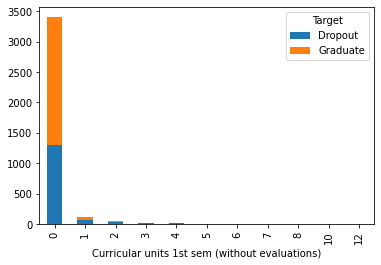

In [ ]:
for col in sem_1.columns:
  if col != 'Target':
   sem_1.groupby([col,'Target']).size().unstack().plot(kind='bar', stacked=True);

Let's do the same for the 2nd semester

In [ ]:
sem_2 = df[['Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
              'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
             'Curricular units 2nd sem (without evaluations)','Target']].copy()

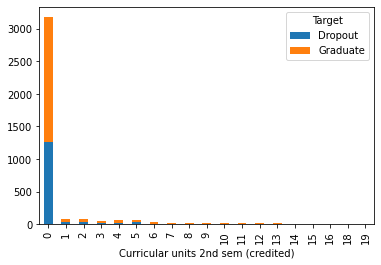

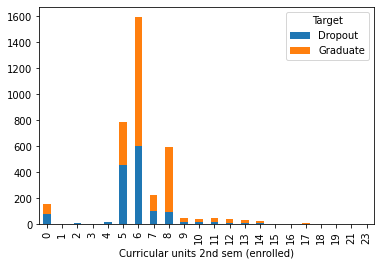

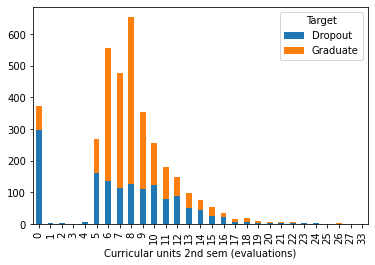

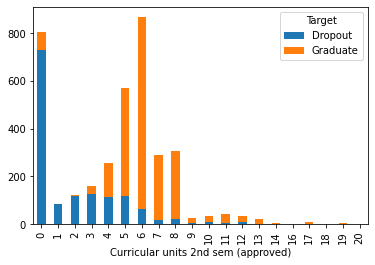

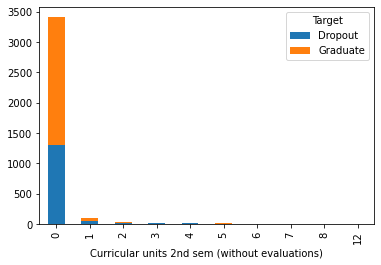

In [ ]:
for col in sem_2.columns:
  if col != 'Target':
    col_count = sem_2[col].count()
    sem_2.groupby([col,'Target']).size().unstack().plot(kind='bar', stacked=True);
    #sem_2.groupby([col,'Target']).count()/sem_2[col].count()


####Observations
- `Curricular units 1st/2nd sem credited` appear to be bad data.  If you are receiving credit for 0 curricular units how can you graduate?  These columns are skewed greatly toward 0, and do not provide information for future modeling, therefore should be dropped
 - [x] Drop `Curricular units 1st/2nd sem (credited)` columns

- `Curricular units 1st/2nd sem enrolled` - shows a trend that students who enroll in more classes tend to graduate more.  

- `Curricular units 1st/2nd sem (evaluations)` - Shows a decline in the dropout rate with the increase in number of evaluations.  If the student has 0 evaluations for the semester it is of higher probability that they dropped out.  Although there are students who graduate while not having evaluations in the 1st and 2nd semesters these groups make up a very small portion of the dataset

- `Curricular units 1st/2nd sem (approved)` - Again we see the dropout rate the highest for students with 0 approved curricular units.  The greatest number of graduates had 6 curricular units each semester.  This must represent a healthy work-life balance.

- `Curricular units 1st/2nd sem (without evaluations)` have approximately 93.5% weighting toward a value of 0.  This data doesnt give us much insight into the students success because it is only telling us that 93.5% of the time the student had 0 courses that were not evaluated, i,e. most of the time the courses were evaluated.  When we look at the graduate/dropout rate for this feature, we again don't gain much insight as both appear to be normal ratios


###Parental Impact Analysis (FUTURE WORK)
- [ ] Look at columns that pertain to parents to determine dropout rate

### Binary-class Analysis (FUTURE WORK)
 - [ ] compare the drop out rate with the binary-class columns

#--------> QUESTION <--------
- [ ]  How can we show correlation for categorical features?
- [ ] Explore the [Bokeh.heatmap_chart](https://docs.bokeh.org/en/0.11.1/docs/gallery/heatmap_chart.html) docs

##Heatmap
- [x] To see a correlation to the target variable we have to numerically encode the target.
 

In [ ]:
target_labels = ['Graduate', 'Dropout']
df['Target'] = df['Target'].map({'Graduate':0, 'Dropout':1})

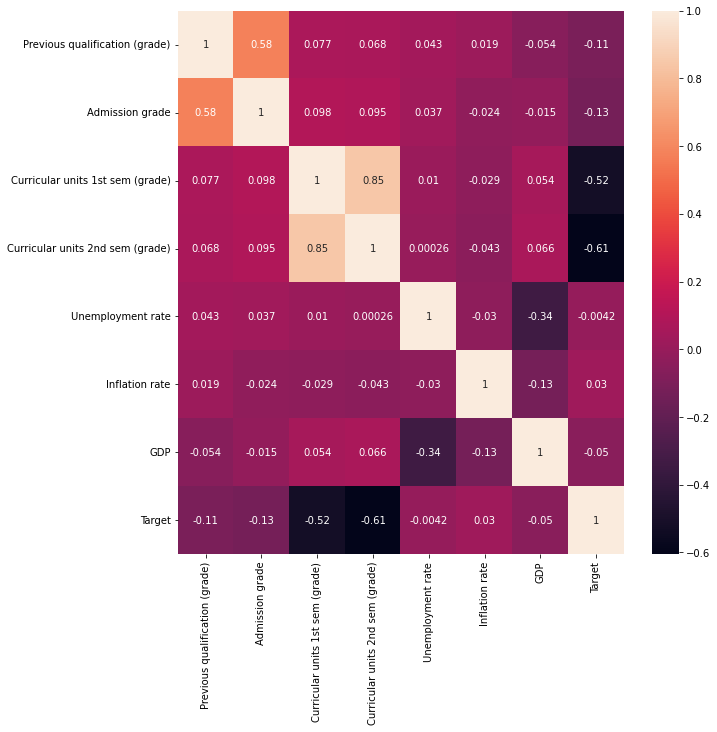

In [ ]:
fig, ax = plt.subplots(figsize=(10,10));
sns.heatmap(df.corr(), annot=True, ax=ax);

>The strongest correlations to the Target variable are:
 - Curricular Units 1st sem (grade): -52%
 - Curricular Units 2nd sem (grade): -61%


##Production Graphics
The correlation between good grades and graduating is not understated in this data.  While my initial thoughts were to look at socio-economic factors for predicting dropout rates, I was left with the simple fact that good students who get good grades have the strongest tendancy to graduate.  This will be made obvious in the next graphics.  These graphics show the distribution of student grades and their dropout rates.  I observe:
- **Graduates** shown in *blue* have a 1st semester mean grade of 13.1 with a tight distribuition bewtween 10 and 17.  Outliers are to the high side.  In the second semester the mean graduate grade is 13.14 with a tight distribution from 10 to 17.   
- **Dropouts** shown in *orange* have a 1st semester mean grade of 12.1 with a wide distribuition bewtween 0 and 12.5.  There are a few outliers on high side.  In the second semester the mean dropout grade is 12.07 with a wide distribution from 0 to 12.5.  

**NOTE** in these graphics I don not show the count of students with a zero score for their semester grade in the histogram plots on the left.  The mean grade values for graduate and dropouts is calculated without the 0-values.  In the box plots on the right of the image I include the 0-value grades.  I do this to show how narrow the grade range is for graduates and how wide it goes for dropouts

In [ ]:
df2 = df.loc[df["Curricular units 1st sem (grade)"]>0]
df3 = df.loc[df["Curricular units 2nd sem (grade)"]>0]
#Graduates
#print(f'Graduates 1st Semester: \n {df2.loc[df2["Target"]==0]["Curricular units 1st sem (grade)"].describe()}\n')
#print(f'Graduates 2nd Semester: \n {df3.loc[df3["Target"]==0]["Curricular units 2nd sem (grade)"].describe()}\n')

print(f'Dropouts 1st Semester: \n {df2.loc[df2["Target"]==1]["Curricular units 1st sem (grade)"].describe()}\n')
print(f'Dropouts 2nd Semester: \n {df3.loc[df3["Target"]==1]["Curricular units 2nd sem (grade)"].describe()}\n')

Dropouts 1st Semester: 
 count    851.000000
mean      12.117165
std        1.342302
min        9.800000
25%       11.250000
50%       12.000000
75%       13.000000
max       18.000000
Name: Curricular units 1st sem (grade), dtype: float64

Dropouts 2nd Semester: 
 count    694.000000
mean      12.079194
std        1.399788
min       10.000000
25%       11.000000
50%       12.000000
75%       13.000000
max       17.714286
Name: Curricular units 2nd sem (grade), dtype: float64



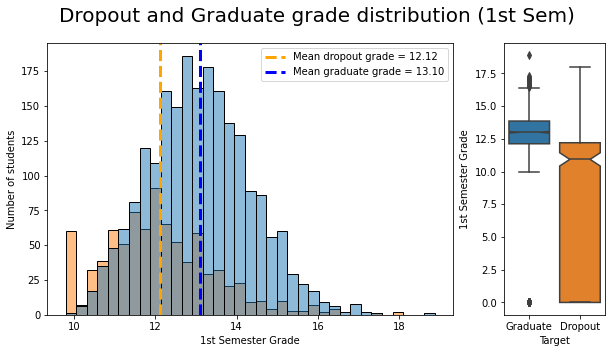

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5),
                       gridspec_kw={'width_ratios':[0.8,0.2]})
p1 = sns.histplot(data=df2, x="Curricular units 1st sem (grade)", hue='Target', ax=ax[0])
p1.set_xlabel('1st Semester Grade')
p1.set_ylabel('Number of students')
#Mean grades for dropouts and graduates
drop_m_grade=df2.loc[df2['Target']==1]["Curricular units 1st sem (grade)"].mean()
grad_m_grade=df2.loc[df2['Target']==0]["Curricular units 1st sem (grade)"].mean()
ax[0].axvline(drop_m_grade,color='orange', ls='--', lw=3,
            label=f"Mean dropout grade = {drop_m_grade:,.2f}");
ax[0].axvline(grad_m_grade,color='blue', ls='--', lw=3,
            label=f"Mean graduate grade = {grad_m_grade:,.2f}");

ax[0].legend()

#Show a boxplot distribution of grades
p2 = sns.boxplot(data=df,y="Curricular units 1st sem (grade)", 
                 x='Target', ax=ax[1], notch = True)
p2.set_ylabel('1st Semester Grade')
p2.set_xticklabels(['Graduate','Dropout'])

fig.suptitle("Dropout and Graduate grade distribution (1st Sem)", fontsize=20)
plt.show(fig)

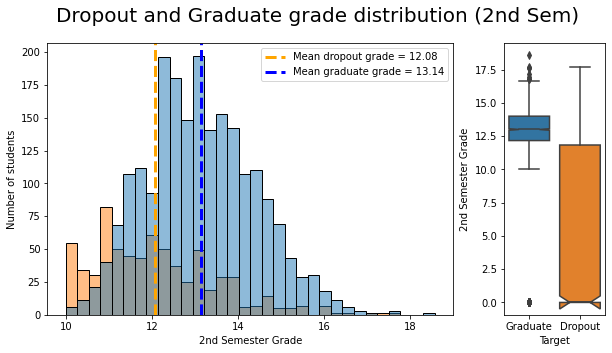

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5),
                       gridspec_kw={'width_ratios':[0.8,0.2]})
p1 = sns.histplot(data=df3, x="Curricular units 2nd sem (grade)", hue='Target', ax=ax[0])
p1.set_xlabel('2nd Semester Grade')
p1.set_ylabel('Number of students')
#Mean grades for dropouts and graduates
drop_m_grade=df3.loc[df3['Target']==1]["Curricular units 2nd sem (grade)"].mean()
grad_m_grade=df3.loc[df3['Target']==0]["Curricular units 2nd sem (grade)"].mean()
ax[0].axvline(drop_m_grade,color='orange', ls='--', lw=3,
            label=f"Mean dropout grade = {drop_m_grade:,.2f}");
ax[0].axvline(grad_m_grade,color='blue', ls='--', lw=3,
            label=f"Mean graduate grade = {grad_m_grade:,.2f}");

ax[0].legend()

#Show a boxplot distribution of grades
p2 = sns.boxplot(data=df,y="Curricular units 2nd sem (grade)", 
                 x='Target', ax=ax[1], notch = True)
p2.set_ylabel('2nd Semester Grade')
p2.set_xticklabels(['Graduate','Dropout'])

fig.suptitle("Dropout and Graduate grade distribution (2nd Sem)", fontsize=20)
plt.show(fig)

##Drop Columns

In [ ]:
#Drop Categoricals
df.drop(columns = ["Marital status", "Previous qualification", "Nacionality", 
                   "Curricular units 1st sem (credited)", "Curricular units 1st sem (without evaluations)",
                   "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (without evaluations)"
                  ], axis=1, inplace=True)


#Target Balance

In [ ]:
df['Target'].value_counts(normalize=True)

0    0.60854
1    0.39146
Name: Target, dtype: float64

> This is a classification problem. Target `Target = [Graduate : 0, Dropout : 1]` 

>The target variable shows students graduating (60.1%) while the minority dropped out (39%).
 - [x] Include sampling technique during modeling to handle this imbalance of data. Choice of over-/undersampling or SMOTE. See `Custom Functions:eval_sampling`

#Train Test Split

In [ ]:
X = df.drop('Target', axis =1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


#Data Pipelines/Preprocessing

This dataset has continuous, categorical nominal and ordinal features.  Continuous data must be scaled; categorical nomial data must be run through a One Hot Encoder; and categorical ordinal through an OrdinalEncoder.  Recall, many of the categories have 2 features.  

##Transformers
**Standard Scaler** - transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution. It is more useful in classification than regression

In [ ]:
#instantiate Standard Scaler
scaler = StandardScaler()

#instantiate OHE
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

#Deal with ordinal features.  In this case it's just the Application Order column
ord_labels = [[6,5,4,3,2,1,0]]
ord = OrdinalEncoder(categories=ord_labels)

##Pairing Data with transformers
Create tuples of data and encoders/scalers to create the start of the pipeline

In [ ]:
#numerical columns - Standard Scale
num_cols = X_train.select_dtypes(include='number').columns.tolist()

#Categorical columns -- OHE required
obj_cols = X_train.select_dtypes(include='object').columns.tolist()
obj_cols.remove('Application order')

#Categorical ordinal - Ordinal Encode
ord_cols = ['Application order']

In [ ]:
num_tuple = (scaler, num_cols)
obj_tuple = (ohe, obj_cols)
ord_tuple = (ord, ord_cols)

##Create Column transformer

In [ ]:
#ordinal encoding seems to be creating issues.  Let's skip for now
#col_transformer = make_column_transformer(num_tuple, obj_tuple, ord_tuple)
#Try without ordinal encoding
col_transformer = make_column_transformer(num_tuple, obj_tuple, ord_tuple ,remainder='drop')
col_transformer

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Previous qualification (grade)',
                                  'Admission grade',
                                  'Curricular units 1st sem (grade)',
                                  'Curricular units 2nd sem (grade)',
                                  'Unemployment rate', 'Inflation rate',
                                  'GDP']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Application mode', 'Course',
                                  'Daytime/evening attendance',
                                  "Mot...
                                  'Scholarship holder', 'Age at enrollment',
                                  'International',
                                  'Curricular units 1st sem (enrolled)',
                                  'Curricular units 1st sem (evaluations)',
                                  'Curricular units 1st sem (approved)',
                                  'Curricular units 2nd sem (enrolled)',
                                  'Curricular units 2nd sem (evaluations)',
                                  'Curricular units 2nd sem (approved)']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[[6, 5, 4, 3, 2, 1,
                                                             0]]),
                                 ['Application order'])])

#Data Imbalance
The count of classes in the target feature shows imbalance.  The three methods for balancing the data are:
1. SMOTE - Create synthetic data with a KNN model on the data near the center of the minority data cluster.
2. Undersampling - Decrease the greater classes size by random value removal
3. Oversampling - Increase the lesser classes size by inserting duplicate values

In this analysis, I will show the impact of each technique on the model predictions.


###SMOTE - Synthetic Minority Oversampling Technique
Works by selecting pair of minority class observations and then creating a synthetic point that lies on the line connecting these two. It is pretty liberal about selecting the minority points and may end up picking up minority points that are outliers.

To use SMOTE we have to fit to a SMOTE-pipeline
i.e. 
```
log_reg_smote = LogisticRegression(max_iter = 1000)
log_reg_smote_pipe = smote_pipe(scaler, smote, log_reg_smote)
```

In [ ]:
#Create the Smote sampling strategy
smote = SMOTE(sampling_strategy='auto')

#create smote-resized X_, y_ values
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#show the resized datasets
print('SMOTE X_train_smote class balance')
print(pd.Series(y_train_smote).value_counts())

SMOTE X_train_smote class balance
1    1656
0    1656
Name: Target, dtype: int64


###Undersampling
Decrease the greater classes size by random value removal

In [ ]:
# Create an undersampling pipeline
under_sampler = RandomUnderSampler()
under_sample_pipe = make_sampler_pipeline(scaler, under_sampler)

# Scale and oversample the data.
X_train_under, y_train_under = under_sample_pipe.fit_resample(X_train, y_train)

# Explore the overesampled data
print('Undersampled X_train_over class balance')
print(pd.Series(y_train_under).value_counts())

Undersampled X_train_over class balance
0    1066
1    1066
Name: Target, dtype: int64


###Oversampling
Introduce duplicates of the data in the minority class.

In [ ]:
# Create an oversampling pipeline
over_sampler = RandomOverSampler()
over_sample_pipe = make_sampler_pipeline(scaler, over_sampler)

# Scale and oversample the data.
X_train_over, y_train_over = over_sample_pipe.fit_resample(X_train, y_train)

# Explore the overesampled data
print('Oversampled X_train_over class balance')
print(pd.Series(y_train_over).value_counts())

Oversampled X_train_over class balance
1    1656
0    1656
Name: Target, dtype: int64


#PCA
PCA transforms our features into a new set of variables called Principal Components, which are linear combinations of all of our original features. The first principal component accounts for the largest variance in the data, and each subsequent component has a lower variance. The transformed data can then be visualized in a lower-dimensional space, typically two or three dimensions, making it easier to identify patterns and relationships. 

This should improve the our models computational speed as it shows a significant reduction in model features need to achieve 95% variance

In [ ]:
#Instantiate the PCA
pca=PCA()

#Scale and encode the training data via col_transformer pipeline
X_train_trans = col_transformer.fit_transform(X_train)

#Calculate the Prinicipal components by fitting the transformed X_train to the PCA
pcs = pca.fit_transform(X_train_trans)

In [ ]:
#Set the target variance to 95%
pca = PCA(n_components=.95)
pcs = pca.fit_transform(X_train_trans)

In [ ]:
print('Shape before PCA:', X_train_trans.shape)
print('Shape after PCA:', pcs.shape)
print('Column count reduced by: ', X_train_trans.shape[1] - pcs.shape[1])

Shape before PCA: (2722, 371)
Shape after PCA: (2722, 95)
Column count reduced by:  276


Using PCAs we can significantly reduce the computational demand from all the One Hot Encoded features.  

#Prediction Models
For this project I will compare the following models for their ability to predict the `Target` outcome. 

1. Models used
 - Random Forest Classifier
 - K Nearest Neighbors Classifier

2. For each of these models, I will look at the effects of treating the Target data imbalance with:
 - SMOTE
 - Undersampling
 - Oversampling

  A custom function `eval_sampling` was included to print the classification report and plot the confusion matrix for each model.  

3. After evaluating the balancing technique, each model will be evaluated for use with PCA or not. 

4. Finally, the model will be tuned by adjusting various hyperparameters. The metrics for the each model will be compared along the way to show how each step in the pipe lines effect the model.

##Random Forest

###Base model

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
rf_pipe = make_pipeline(col_transformer,rf)
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Previous qualification '
                                                   '(grade)',
                                                   'Admission grade',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Unemployment rate',
                                                   'Inflation rate', 'GDP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Application mode...
                                                   '(enrolled)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[6,
                                                                              5,
                                                                              4,
                                                                              3,
                                                                              2,
                                                                              1,
                                                                              0]]),
                                                  ['Application order'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       553
           1       0.93      0.87      0.90       355

    accuracy                           0.92       908
   macro avg       0.92      0.91      0.92       908
weighted avg       0.92      0.92      0.92       908



Text(0.5, 1.0, 'Random Forest Classifier [No Tuning]')

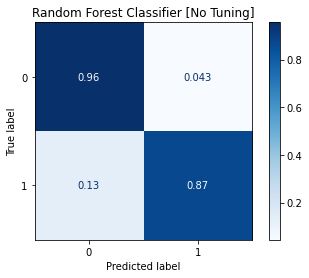

In [ ]:
rf_pipe_preds = rf_pipe.predict(X_test)
print(classification_report(y_test, rf_pipe_preds))
disp = ConfusionMatrixDisplay.from_predictions(y_test, rf_pipe_preds,normalize='true',cmap='Blues');
disp.ax_.set_title('Random Forest Classifier [No Tuning]')
disp.ax_.set_xticklabels(['Graduate', 'Dropout'])
disp.ax_.set_yticklabels(['Graduate', 'Dropout'])

In [ ]:
#tabulate Random Forest metrics
rf_metrics = get_metrics(rf_pipe, "RF Base")

###Compare Over-/Under-/SMOTE sampling

-------------------------
Comparison of Under-, Over-, and SMOTE class balancing methods for Model:Random Forest
-------------------------
Undersampling
- - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       553
           1       0.87      0.91      0.89       355

    accuracy                           0.91       908
   macro avg       0.91      0.91      0.91       908
weighted avg       0.91      0.91      0.91       908

- - - - - - - - - - - - - - - 
Oversampling
- - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       553
           1       0.92      0.88      0.90       355

    accuracy                           0.93       908
   macro avg       0.93      0.92      0.92       908
weighted avg       0.93      0.93      0.93       908

- - - - - - - - - - - - - - - 
SMOTE
- - - - - - - - - - - - - - - 
              preci

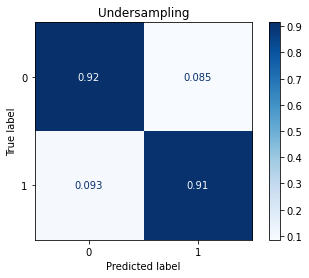

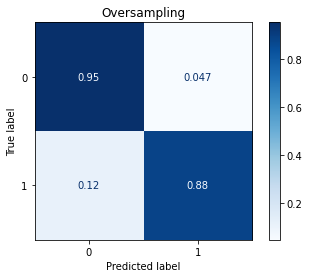

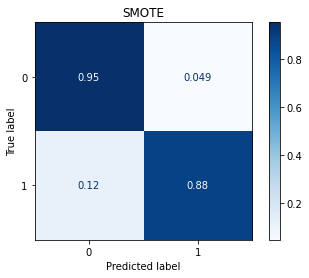

In [ ]:
rf_samp_rpt = eval_sampling(rf, "Random Forest")

In [ ]:
rf_samp_rpt.head()

,Model,Base Accuracy,Undersamping Accuracy,Oversamping Accuracy,SMOTE Accuracy,Base Precision,Undersamping Precision,Oversamping Precision,SMOTE Precision,Base Model Recall,Undersamping Recall,Oversamping Recall,SMOTE Recall
0,Random Forest,0.922907,0.911894,0.926211,0.92511,0.927928,0.872629,0.923529,0.920821,0.870423,0.907042,0.884507,0.884507


Comparing the sampling methods we see:
- The **Base model** has the high Accuracy, and precision.
  - Greater Accuracy can be deceiving though with an imbalanced dataset, so this should be taken with a grain of salt
  - Greater Precision means we have reduced the number of false positives
- **Undersampling** produces best Recall score- which means our model shows fewer false negatives
- Do false negative cause any major concerns? 
 - Not Really.  Recall, a False negative means the model predicted the student graduated when they did not. 
- Do false positives cause any concern?
 - Again, not really as this model is not diagnosing cancer, but it would be worthwhile to minimize this as much as possible.  

For Random Forest I will use Undersampling in the model as it has the lowest rate of False Positives (7.5%) and False Negatives (8.5%).  This is the most balanced percent of FN, FP among all sampling methods.

In [ ]:
rf_under_pipe = make_sampler_pipeline(col_transformer, under_sampler, rf)
rf_under_fit = rf_under_pipe.fit(X_train, y_train);

###PCA

In [ ]:
rf_pca = make_sampler_pipeline(col_transformer, under_sampler, pca, rf)

In [ ]:
rf_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Previous qualification '
                                                   '(grade)',
                                                   'Admission grade',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Unemployment rate',
                                                   'Inflation rate', 'GDP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Application mode...
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[6,
                                                                              5,
                                                                              4,
                                                                              3,
                                                                              2,
                                                                              1,
                                                                              0]]),
                                                  ['Application order'])])),
                ('randomundersampler', RandomUnderSampler()),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
#Get the metrics on PCA
rf_pca_metrics=get_metrics(rf_pca, "RF PCA")

###Tuning RF [NO PCA]

In [ ]:
#Look at the RF pipeline for tuning parameters
rf_under_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    ['Previous qualification (grade)',
                                     'Admission grade',
                                     'Curricular units 1st sem (grade)',
                                     'Curricular units 2nd sem (grade)',
                                     'Unemployment rate', 'Inflation rate',
                                     'GDP']),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['Application mode', 'Course',
                                     'Daytime/evening attendance',
                                     "Mot...
                                     'Scholarship holder', 'Age at enrollment',
                               

In [ ]:
#These look good
rf_param_grid = {'randomforestclassifier__n_estimators':range(75,125,5),
                 'randomforestclassifier__max_depth':range(5,10,1)}
rf_grid = GridSearchCV(rf_under_pipe, rf_param_grid)
 
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Previous '
                                                                          'qualification '
                                                                          '(grade)',
                                                                          'Admission '
                                                                          'grade',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Unemployment '
                                                                          'rate',
                                                                          'Inflation '
                                                                          'rate',
                                                                          'GDP']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unkno...
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(approved)']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[[6,
                                                                                                     5,
                                                                                                     4,
                                                                                                     3,
                                                                                                     2,
                                                                                                     1,
                                                                                                     0]]),
                                                                         ['Application '
                                                                          'order'])])),
                                       ('randomundersampler',
                                        RandomUnderSampler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': range(5, 10),
                         'randomforestclassifier__n_estimators': range(75, 125, 5)})

####Evaluate Tuned Model

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       553
           1       0.88      0.89      0.89       355

    accuracy                           0.91       908
   macro avg       0.91      0.91      0.91       908
weighted avg       0.91      0.91      0.91       908



[Text(0, 0, 'Graduate'), Text(0, 0, 'Dropout')]

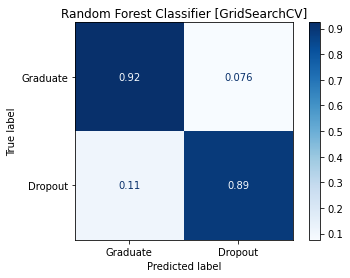

In [ ]:
rf_grid_preds = rf_grid.predict(X_test)
print(classification_report(y_test, rf_grid_preds))
disp = ConfusionMatrixDisplay.from_predictions(y_test, rf_grid_preds,normalize='true',cmap='Blues');
disp.ax_.set_title('Random Forest Classifier [GridSearchCV]')
disp.ax_.set_xticklabels(['Graduate', 'Dropout'])
disp.ax_.set_yticklabels(['Graduate', 'Dropout'])

Using GridSearch and tuning hyperparameters we see an increase in accuracy and an increase in FP and FN.  This did not help the model...

In [ ]:
#tabulate grid search metrics
rf_grid_no_pca_metrics = get_metrics(rf_grid, "RF Grid [No PCA]")

###Tune RF [PCA]

In [ ]:
#Use the same paramaters as before
rf_grid_pca = GridSearchCV(rf_pca, rf_param_grid)
rf_grid_pca.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Previous '
                                                                          'qualification '
                                                                          '(grade)',
                                                                          'Admission '
                                                                          'grade',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Unemployment '
                                                                          'rate',
                                                                          'Inflation '
                                                                          'rate',
                                                                          'GDP']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unkno...
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[[6,
                                                                                                     5,
                                                                                                     4,
                                                                                                     3,
                                                                                                     2,
                                                                                                     1,
                                                                                                     0]]),
                                                                         ['Application '
                                                                          'order'])])),
                                       ('randomundersampler',
                                        RandomUnderSampler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': range(5, 10),
                         'randomforestclassifier__n_estimators': range(75, 125, 5)})

####Evaluate Tuned model

In [ ]:
rf_grid_pca_metrics = get_metrics(rf_grid_pca, "RF Grid [PCA]")

###Compare Metrics


In [ ]:
compare = rf_metrics.copy()
compare = compare.append(rf_pca_metrics)
compare = compare.append(rf_grid_no_pca_metrics)
compare = compare.append(rf_grid_pca_metrics)
compare.head()

,Model:,Accuracy,Precision,Recall,F1 Score
0,RF Base,0.922907,0.927928,0.870423,0.898256
0,RF PCA,0.867841,0.787286,0.907042,0.842932
0,RF Grid [No PCA],0.910793,0.882682,0.890141,0.886396
0,RF Grid [PCA],0.873348,0.807692,0.887324,0.845638


For the Random Forest Classifier, the pipeline that did not use PCA shows the highest accuracy, precision, recall, and F1 scores.

##KNeighbors Classifier


###Base model

In [ ]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(col_transformer, knn)
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Previous qualification '
                                                   '(grade)',
                                                   'Admission grade',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Unemployment rate',
                                                   'Inflation rate', 'GDP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Application mode...
                                                   'Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[6,
                                                                              5,
                                                                              4,
                                                                              3,
                                                                              2,
                                                                              1,
                                                                              0]]),
                                                  ['Application order'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       553
           1       0.94      0.73      0.82       355

    accuracy                           0.88       908
   macro avg       0.90      0.85      0.87       908
weighted avg       0.89      0.88      0.87       908



Text(0.5, 1.0, 'K Nearest Neighbors Classifier [No Tuning]')

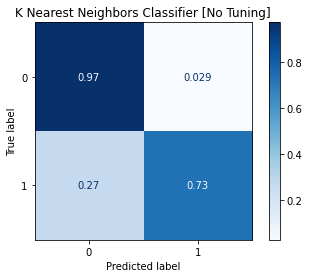

In [ ]:
knn_pipe_preds = knn_pipe.predict(X_test)
print(classification_report(y_test, knn_pipe_preds))
disp = ConfusionMatrixDisplay.from_predictions(y_test, knn_pipe_preds,normalize='true',cmap='Blues');
disp.ax_.set_title('K Nearest Neighbors Classifier [No Tuning]')
disp.ax_.set_xticklabels(['Graduate', 'Dropout'])
disp.ax_.set_yticklabels(['Graduate', 'Dropout'])

In [ ]:
knn_metrics = get_metrics(knn_pipe, "KNN Base")

###Compare Over-/Under-/SMOTE sampling

-------------------------
Comparison of Under-, Over-, and SMOTE class balancing methods for Model:KNeighbors
-------------------------
Undersampling
- - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       553
           1       0.90      0.81      0.85       355

    accuracy                           0.89       908
   macro avg       0.89      0.87      0.88       908
weighted avg       0.89      0.89      0.89       908

- - - - - - - - - - - - - - - 
Oversampling
- - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       553
           1       0.85      0.80      0.82       355

    accuracy                           0.87       908
   macro avg       0.86      0.85      0.86       908
weighted avg       0.87      0.87      0.86       908

- - - - - - - - - - - - - - - 
SMOTE
- - - - - - - - - - - - - - - 
              precisio

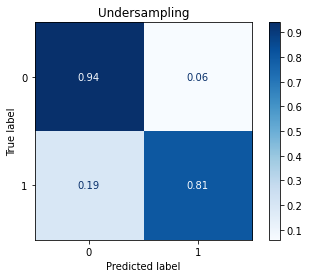

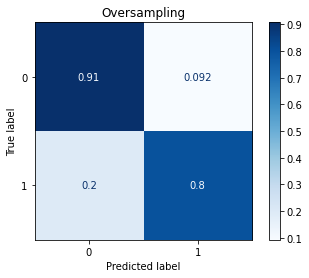

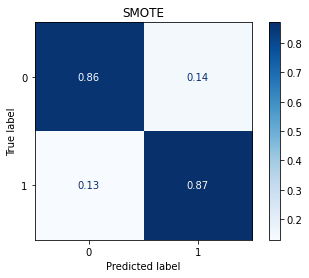

In [ ]:
knn_samp_rpt = eval_sampling(knn, "KNeighbors")

In [ ]:
knn_samp_rpt.head()

,Model,Base Accuracy,Undersamping Accuracy,Oversamping Accuracy,SMOTE Accuracy,Base Precision,Undersamping Precision,Oversamping Precision,SMOTE Precision,Base Model Recall,Undersamping Recall,Oversamping Recall,SMOTE Recall
0,KNeighbors,0.877753,0.887665,0.865639,0.861233,0.942029,0.896552,0.847761,0.794344,0.732394,0.805634,0.8,0.870423


Varying the sampling technique produces a mixed set of results for the KNN classifier.  
 - Undersampling produces the greatest accuracy (88%)
 - The Base model produces the highest precision, but since the data is imbalanced, this is not a great measure.
 - Undersampling produces the second best precision score 88.5%
 - SMOTE produces the highest recall.

For KNeighbors Classifier I am going to use SMOTE which produces the lowest aggregate FP, and FN scores.  

In [ ]:
knn_smote_pipe = make_sampler_pipeline(col_transformer, smote, knn)
knn_smote_fit = knn_smote_pipe.fit(X_train, y_train);

###PCA

In [ ]:
knn_pca = make_sampler_pipeline(col_transformer, smote, pca, knn)
knn_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Previous qualification '
                                                   '(grade)',
                                                   'Admission grade',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Unemployment rate',
                                                   'Inflation rate', 'GDP']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Application mode...
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[6,
                                                                              5,
                                                                              4,
                                                                              3,
                                                                              2,
                                                                              1,
                                                                              0]]),
                                                  ['Application order'])])),
                ('smote', SMOTE()), ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
knn_pca_metrics = get_metrics(knn_pca, "KNN PCA")

###Tune KNN [NO PCA]

In [ ]:
knn_param_grid = {'kneighborsclassifier__n_neighbors':[1,5,10.20],
            'kneighborsclassifier__p': range(1,5,1)}
knn_grid = GridSearchCV(knn_smote_pipe, knn_param_grid)
knn_grid.fit(X_train,y_train)      

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-p

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Previous '
                                                                          'qualification '
                                                                          '(grade)',
                                                                          'Admission '
                                                                          'grade',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Unemployment '
                                                                          'rate',
                                                                          'Inflation '
                                                                          'rate',
                                                                          'GDP']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unkno...
                                                                          '(enrolled)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(evaluations)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(approved)']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[[6,
                                                                                                     5,
                                                                                                     4,
                                                                                                     3,
                                                                                                     2,
                                                                                                     1,
                                                                                                     0]]),
                                                                         ['Application '
                          

####Evaluate Tuned model

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       553
           1       0.89      0.77      0.83       355

    accuracy                           0.87       908
   macro avg       0.88      0.85      0.86       908
weighted avg       0.87      0.87      0.87       908



[Text(0, 0, 'Graduate'), Text(0, 0, 'Dropout')]

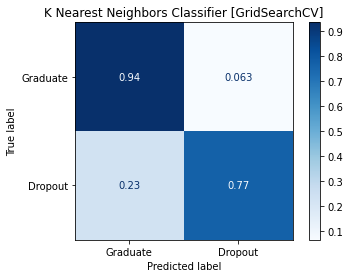

In [ ]:
knn_grid_preds = knn_grid.predict(X_test)
print(classification_report(y_test, knn_grid_preds))
disp = ConfusionMatrixDisplay.from_predictions(y_test, knn_grid_preds,normalize='true',cmap='Blues');
disp.ax_.set_title('K Nearest Neighbors Classifier [GridSearchCV]')
disp.ax_.set_xticklabels(['Graduate', 'Dropout'])
disp.ax_.set_yticklabels(['Graduate', 'Dropout'])

In [ ]:
knn_grid_no_pca_metrics = get_metrics(knn_grid, "KNN Grid [No PCA]")

###Tune KNN [w/ PCA]

In [ ]:
#Use the same paramaters as before
knn_grid_pca = GridSearchCV(knn_pca, knn_param_grid)
knn_grid_pca.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-p

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Previous '
                                                                          'qualification '
                                                                          '(grade)',
                                                                          'Admission '
                                                                          'grade',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Unemployment '
                                                                          'rate',
                                                                          'Inflation '
                                                                          'rate',
                                                                          'GDP']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unkno...
                                                                          'sem '
                                                                          '(evaluations)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(approved)']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[[6,
                                                                                                     5,
                                                                                                     4,
                                                                                                     3,
                                                                                                     2,
                                                                                                     1,
                                                                                                     0]]),
                                                                         ['Application '
                                                                          'order'])])),
                                       ('smote', SMOTE()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             par

#### Evalute Tuned model

In [ ]:
knn_grid_pca_metrics = get_metrics(knn_grid_pca, "KNN Grid [PCA]")

###Compare Metrics

In [ ]:
compare_knn = knn_metrics.copy()
compare_knn = compare_knn.append(knn_pca_metrics)
compare_knn = compare_knn.append(knn_grid_no_pca_metrics)
compare_knn = compare_knn.append(knn_grid_pca_metrics)
compare_knn.head()

,Model:,Accuracy,Precision,Recall,F1 Score
0,KNN Base,0.877753,0.942029,0.732394,0.824089
0,KNN PCA,0.851322,0.782051,0.859155,0.818792
0,KNN Grid [No PCA],0.872247,0.886731,0.771831,0.825301
0,KNN Grid [PCA],0.863436,0.821727,0.830986,0.826331


In [ ]:
compare.head()

,Model:,Accuracy,Precision,Recall,F1 Score
0,RF Base,0.922907,0.927928,0.870423,0.898256
0,RF PCA,0.867841,0.787286,0.907042,0.842932
0,RF Grid [No PCA],0.910793,0.882682,0.890141,0.886396
0,RF Grid [PCA],0.873348,0.807692,0.887324,0.845638
